In [4]:
!pip install -q pyomo

In [5]:
# Importing libraries

from pyomo.environ import *

# **Problem 1**

In [ ]:
!apt-get install -y -qq glpk-utils

**Indexes:**

- *i* is the product with image.png.

- *j* is the material with image.png.

- *t* is the day with image.png.

**Decision variables:**

- image.png is the quantity of product *i* for the day *t*.

**Parameters:**

- image.png is the price for the product *i* (no-time dependable for this problem).
- image.png is the amount of material *j* needed for manufacturing the product *i*.
- image.png supply limite for material *j* (no-time dependable).

**Objectivo function**

The idea is to obtaine a feasible production plan to maximize the total profit (revenue since no cost are ramarked in the problem).

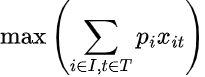

**Constraints:**

For each day, the supply of materials are limited:

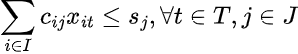

lagrida_latex_editor (9).png


In [31]:
# Model
model = AbstractModel()

# Max val
model.m = Param(within=NonNegativeIntegers)
model.n = Param(within=NonNegativeIntegers)
model.w = Param(within=NonNegativeIntegers)

# Sets
model.I = RangeSet(1, model.m)
model.J = RangeSet(1, model.n)
model.T = RangeSet(1, model.w)

# Variable
model.x = Var(model.I, model.T, within=NonNegativeReals, initialize=0)

# Parameters
model.p = Param(model.I)
model.c = Param(model.I, model.J)
model.s = Param(model.J)

# Constraints
def supply_rule(model, j, t):
    return sum(model.c[i, j] * model.x[i, t] for i in model.I) <= model.s[j]
model.supply_constraint = Constraint(model.J, model.T, rule=supply_rule)

# Objetive function
def obj_rule(model):
    return sum(sum(model.p[i] * model.x[i, t] for i in model.I) for t in model.T)
model.obj = Objective(rule=obj_rule, sense=maximize)

# Optimization
opt = SolverFactory('ipopt')
instance = model.create_instance('/content/params_1.dat')
results = opt.solve(instance)

In [32]:
# Checking status
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)

feasible


In [33]:
print(f'Maximum revenue [USD]: {value(instance.obj):.04f}')

Maximum revenue [USD]: 3404.4586


In [34]:
[print(f'Maximum revenue X{i}{t}: {int(value(instance.x[i,t]))}') for t in range(1,2) for i in range(1,8)]

Maximum revenue X11: 7
Maximum revenue X21: 0
Maximum revenue X31: 0
Maximum revenue X41: 17
Maximum revenue X51: 0
Maximum revenue X61: 0
Maximum revenue X71: 9


[None, None, None, None, None, None, None]

# **Problem 2**

In [2]:
!wget -N -q "https://matematica.unipv.it/gualandi/solvers/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

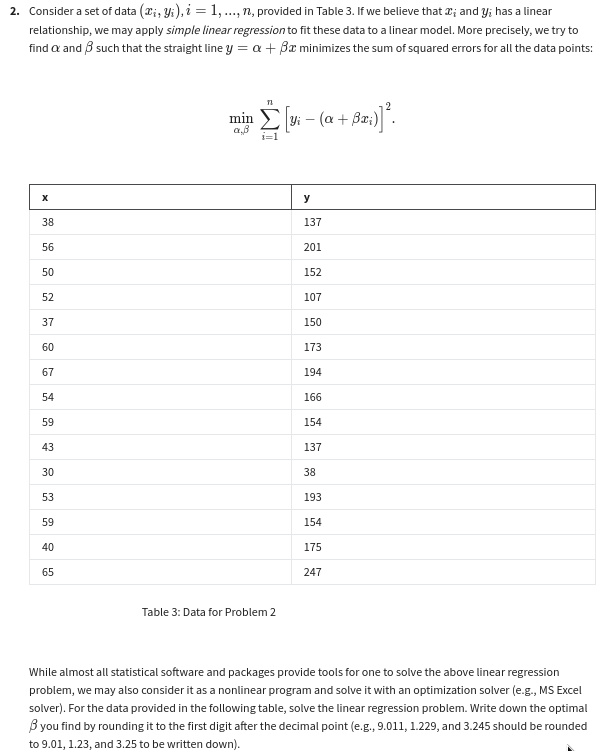

In [12]:
# Model

model2 = AbstractModel()

# Index
model2.n = Param(within=NonNegativeIntegers)
model2.I = RangeSet(1, model2.n)

# Parameters
model2.y = Param(model2.I)
model2.x = Param(model2.I)

# Decision variables
model2.beta = Var(within=Reals)
model2.alpha = Var(within=Reals)

# Objetive function
def obj_rule(model2):
    return sum((model2.y[i] - (model2.alpha + model2.beta * model2.x[i])) ** 2 for i in model2.I)
model2.obj = Objective(rule=obj_rule, sense=minimize)

# Optimization
opt2 = SolverFactory('ipopt', executable='/content/ipopt')
instance2 = model2.create_instance('/content/params_2.dat')
results2 = opt2.solve(instance2)

In [13]:
# Checking status
if (results2.solver.status == SolverStatus.ok) and (results2.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results2.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results2.solver.status)

feasible


In [14]:
print(f'Minimum error : {value(instance2.obj):.04f}')

Minimum error : 15840.3604


In [15]:
print(f'Alpha : {value(instance2.alpha):.02f}')
print(f'Beta : {value(instance2.beta):.02f}')

Alpha : 6.87
Beta : 2.98
